# Loading data

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
from matplotlib import pyplot as plt

In [2]:
malaria_ind_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv")
malaria_death_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv")
malaria_age_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv")

In [3]:
malaria_ind_df

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746
...,...,...,...,...
503,Zambia,ZMB,2015,173.700000
504,Zimbabwe,ZWE,2000,143.200000
505,Zimbabwe,ZWE,2005,142.500000
506,Zimbabwe,ZWE,2010,129.600000


In [4]:
malaria_death_df

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472
...,...,...,...,...
6151,Zimbabwe,ZWE,2012,9.751727
6152,Zimbabwe,ZWE,2013,9.419939
6153,Zimbabwe,ZWE,2014,9.487453
6154,Zimbabwe,ZWE,2015,9.440046


In [5]:
malaria_age_df

,Unnamed: 0,entity,code,year,age_group,deaths
0,1,Afghanistan,AFG,1990,Under 5,184.606435
1,2,Afghanistan,AFG,1991,Under 5,191.658193
2,3,Afghanistan,AFG,1992,Under 5,197.140197
3,4,Afghanistan,AFG,1993,Under 5,207.357753
4,5,Afghanistan,AFG,1994,Under 5,226.209363
...,...,...,...,...,...,...
30775,30776,Zimbabwe,ZWE,2012,50-69,103.185111
30776,30777,Zimbabwe,ZWE,2013,50-69,100.113293
30777,30778,Zimbabwe,ZWE,2014,50-69,99.013890
30778,30779,Zimbabwe,ZWE,2015,50-69,98.091738


In [6]:
malaria_ind_df = malaria_ind_df.rename(columns = {malaria_ind_df.columns[3]: "Incidence_per_1000"})
malaria_death_df = malaria_death_df.rename(columns = {malaria_death_df.columns[3]: "death_per_100000"})
malaria_age_df = malaria_age_df.rename(columns = {'entity': 'Entity', 'code': 'Code', 'year': 'Year'})

# Normalized table and export to SQLite3

In [7]:
entity_code_df = pd.concat([malaria_ind_df[['Entity', 'Code']], malaria_death_df[['Entity', 'Code']], malaria_age_df[['Entity', 'Code']]]).drop_duplicates()

In [8]:
malaria_ind_df = malaria_ind_df[['Entity', 'Year', 'Incidence_per_1000']]
malaria_death_df = malaria_death_df[['Entity', 'Year', 'death_per_100000']]
malaria_age_df = malaria_age_df[['Entity', 'Year', 'age_group', 'deaths']]

In [9]:
entity_code_df

,Entity,Code
0,Afghanistan,AFG
4,Algeria,DZA
8,Angola,AGO
12,Argentina,ARG
16,Azerbaijan,AZE
...,...,...
5805,United States Virgin Islands,VIR
5832,Uruguay,URY
5967,Wales,NaN
5994,Western Europe,NaN


In [10]:
entity_code_df['Code'].isna().sum()

57

In [11]:
conn = sql.connect('malaria.db')

In [12]:
malaria_ind_df.to_sql('MalariaInd', conn)
malaria_death_df.to_sql('MalariaDeath', conn)
malaria_age_df.to_sql('MalariaAgeDeath', conn)
entity_code_df.to_sql('EntityCode', conn)

# Visualisation 1

In [13]:
conn = sql.connect('malaria.db')

Malaria_ind = pd.read_sql('SELECT * FROM MalariaInd', conn)

In [14]:
Malaria_ind

,index,Entity,Year,Incidence_per_1000
0,0,Afghanistan,2000,107.100000
1,1,Afghanistan,2005,46.500000
2,2,Afghanistan,2010,23.900000
3,3,Afghanistan,2015,23.600000
4,4,Algeria,2000,0.037746
...,...,...,...,...
503,503,Zambia,2015,173.700000
504,504,Zimbabwe,2000,143.200000
505,505,Zimbabwe,2005,142.500000
506,506,Zimbabwe,2010,129.600000


In [15]:
Malaria_ind[['Incidence_per_1000']].describe()

,Incidence_per_1000
count,508.000000
mean,141.714565
std,176.637900
min,0.000000
25%,6.986310
50%,57.050000
75%,246.050000
max,1741.000000


Based on the above table, there seems to be a record higher than 1000.

In [16]:
Malaria_ind[Malaria_ind['Incidence_per_1000'] > 1000] # Only one record with Incidence_per_1000 > 1000

,index,Entity,Year,Incidence_per_1000
464,464,Turkey,2000,1741.0


In [17]:
Malaria_ind = Malaria_ind[Malaria_ind['Incidence_per_1000'] <= 1000] # Remove record with Incidence_per_1000 > 1000

In [18]:
print(len(Malaria_ind['Entity'].unique()))
Malaria_ind['Entity'].unique()

127


array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Azerbaijan',
       'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of Congo', 'Djibouti', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD)',
       'East Asia & Pacific (excluding high income)', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Fragile and conflict affected situations', 'Gabon', 'Gambia',
       'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Heavily indebted poor countries (HIPC)',
       'Honduras', 'IBRD only', 'IDA & IBRD total', 'IDA blend',
       'IDA only', 'IDA total', 'India', 'Indonesia', 'Iran', 'Iraq',
      

In [19]:
locations = ['East Asia & Pacific',
            'Sub-Saharan Africa',
            'South Asia',
            'World',
            'Low income',
            'Middle income']

Text(0, 0.5, 'Incidence per 1000')

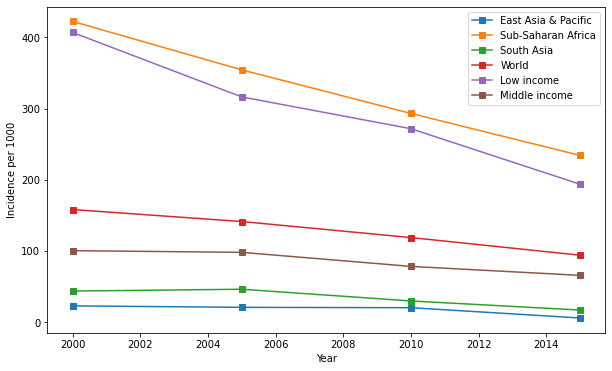

In [20]:
plt.figure(figsize = (10, 6))

for location in locations:
    temp_df = Malaria_ind[Malaria_ind['Entity'] == location]
    plt.plot(temp_df['Year'].tolist(), temp_df['Incidence_per_1000'].tolist(), label = location, marker = "s")
    plt.legend()
    
plt.xlabel('Year')
plt.ylabel('Incidence per 1000')

Some observations from the plot:

1. All the lines displayed on the plot are showing a downward trend, including World
2. Sub-Saharan Africa and Low income regions are showing incidence rate higher than World, suggesting that lower income regions are more likely to be affect by Malaria

To get a more recent picture, I will identify regions that have high malaria incidence based on the latest year provided.

In [21]:
Malaria_ind['Year'].unique()

array([2000, 2005, 2010, 2015], dtype=int64)

In [22]:
Malaria_ind[Malaria_ind['Year'] == 2015][['Incidence_per_1000']].describe()

,Incidence_per_1000
count,127.000000
mean,90.502803
std,115.321950
min,0.000000
25%,1.550000
50%,20.900000
75%,173.500000
max,448.600000


Based on the above table, I will look at Incidence_per_1000 >= 173.5

In [23]:
heavily_affected_regions_df = Malaria_ind[(Malaria_ind['Year'] == 2015) & (Malaria_ind['Incidence_per_1000'] >= 173.5)]
print(len(heavily_affected_regions_df['Entity'].unique()))
heavily_affected_regions_df['Entity'].unique()

32


array(['Benin', 'Burkina Faso', 'Cameroon', 'Central African Republic',
       "Cote d'Ivoire", 'Democratic Republic of Congo',
       'Equatorial Guinea', 'Fragile and conflict affected situations',
       'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Heavily indebted poor countries (HIPC)', 'IDA blend', 'IDA only',
       'IDA total', 'Liberia', 'Low income', 'Malawi', 'Mali',
       'Mozambique', 'Niger', 'Nigeria', 'Pre-demographic dividend',
       'Rwanda', 'Sierra Leone', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (IDA & IBRD)',
       'Sub-Saharan Africa (excluding high income)', 'Togo', 'Uganda',
       'Zambia'], dtype=object)

I will look at the 8 worst regions based on year 2015 and plot a time plot to see the general trend of these regions

Text(0, 0.5, 'Incidence per 1000')

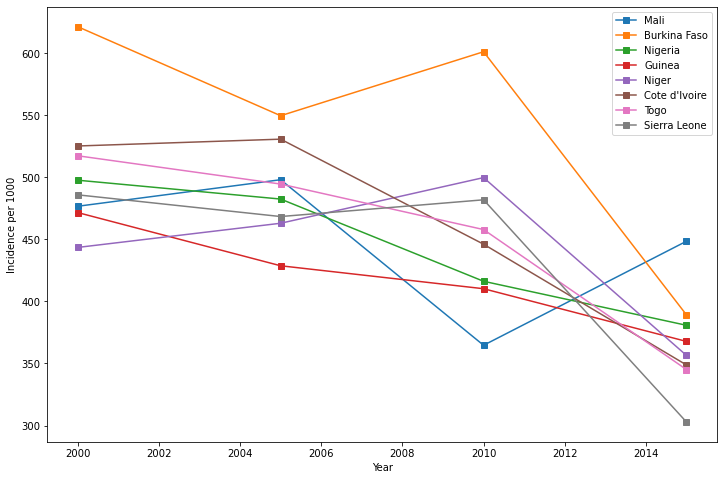

In [24]:
heavily_affected_regions_name = heavily_affected_regions_df.sort_values(by = 'Incidence_per_1000', ascending = False)['Entity'].tolist()

plt.figure(figsize = (12, 8))

for i in range(8):
    temp_df = Malaria_ind[Malaria_ind['Entity'] == heavily_affected_regions_name[i]]
    plt.plot(temp_df['Year'].tolist(), temp_df['Incidence_per_1000'].tolist(), label = heavily_affected_regions_name[i], marker = "s")
    plt.legend()
    
plt.xlabel('Year')
plt.ylabel('Incidence per 1000')

The above plot shows that not all regions are showing consistent downward trend from year 2000 to 2020. From 2010 to 2015, all regions except Mali are showing a downward trend.

# Visualisation 2

In [25]:
Malaria_age_death = pd.read_sql('SELECT * FROM MalariaAgeDeath WHERE Entity = \'World\'', conn)

In [26]:
Malaria_age_death

,index,Entity,Year,age_group,deaths
0,6048,World,1990,Under 5,586161.122620
1,6049,World,1991,Under 5,602734.287725
2,6050,World,1992,Under 5,612688.202533
3,6051,World,1993,Under 5,626224.692402
4,6052,World,1994,Under 5,636119.462322
...,...,...,...,...,...
130,30694,World,2012,50-69,38591.571976
131,30695,World,2013,50-69,38330.804216
132,30696,World,2014,50-69,39074.904377
133,30697,World,2015,50-69,40026.639958


In [27]:
Malaria_age_death.describe()

,index,Year,deaths
count,135.000000,135.00000,135.000000
mean,18373.000000,2003.00000,172565.112715
std,8738.326503,7.81789,245045.221292
min,6048.000000,1990.00000,15103.452338
25%,12210.500000,1996.00000,34447.685299
50%,18373.000000,2003.00000,67558.076605
75%,24535.500000,2010.00000,87929.531183
max,30698.000000,2016.00000,752025.548675


In [28]:
Malaria_age_death.sort_values(by = 'deaths', ascending = False)[:20]

,index,Entity,Year,age_group,deaths
13,6061,World,2003,Under 5,752025.548675
14,6062,World,2004,Under 5,746365.808630
12,6060,World,2002,Under 5,737466.128811
15,6063,World,2005,Under 5,735966.857064
16,6064,World,2006,Under 5,734869.501103
11,6059,World,2001,Under 5,728254.356956
17,6065,World,2007,Under 5,726367.804598
18,6066,World,2008,Under 5,719208.349156
10,6058,World,2000,Under 5,705882.728782
9,6057,World,1999,Under 5,698846.092898


In [29]:
world_age_df = Malaria_age_death[Malaria_age_death['Entity'] == 'World']

world_age_group = world_age_df['age_group'].unique().tolist()
world_age_group

['Under 5', '70 or older', '5-14', '15-49', '50-69']

Text(0, 0.5, 'Deaths')

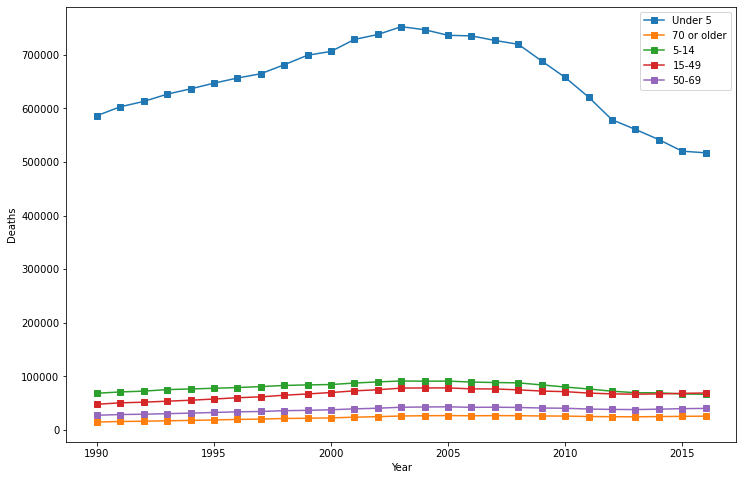

In [30]:
plt.figure(figsize = (12, 8))

for age_group in world_age_group:
    temp_df = world_age_df[world_age_df['age_group'] == age_group]
    plt.plot(temp_df['Year'].tolist(), temp_df['deaths'].tolist(), label = age_group, marker = "s")
    plt.legend()
    
plt.xlabel('Year')
plt.ylabel('Deaths')

From the above plot, it shows that children under 5 are the greatest victim of malaria. Malaria death in age group under 5 is much higher compare to other age groups. To better visualise all the age groups, logarithm is apply on the y axis as shown in the next plot.

Text(0, 0.5, 'log(Deaths)')

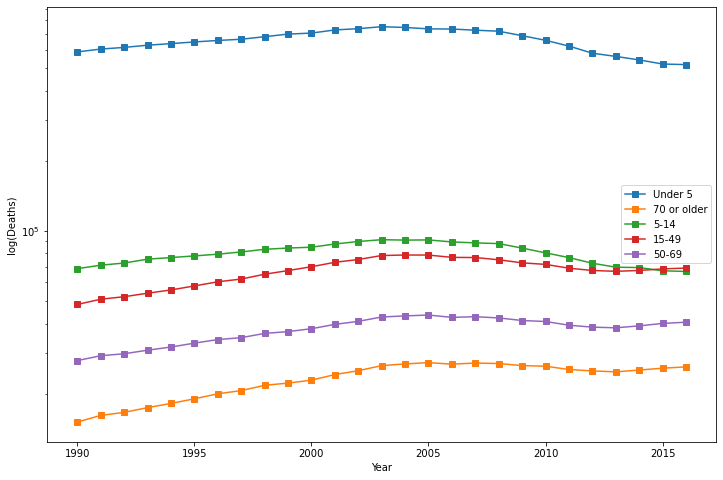

In [31]:
plt.figure(figsize = (12, 8))

for age_group in world_age_group:
    temp_df = world_age_df[world_age_df['age_group'] == age_group]
    plt.plot(temp_df['Year'].tolist(), temp_df['deaths'].tolist(), label = age_group, marker = "s")
    plt.yscale('log')
    plt.legend()
    
plt.xlabel('Year')
plt.ylabel('log(Deaths)')

# Visualisation 3

In [32]:
pd.read_sql('SELECT death_per_100000 FROM MalariaDeath', conn).describe()

,death_per_100000
count,6156.000000
mean,16.375074
std,38.606219
min,0.000000
25%,0.000000
50%,0.020219
75%,3.891035
max,229.228881


In [33]:
pd.read_sql('SELECT Entity FROM MalariaDeath', conn)['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern Europe',
       'Eastern Sub-Saharan Africa', 'Ecuador', 'E

In [34]:
locations = ('Central Asia', 'Central Europe', 'Eastern Europe',
             'Eastern Sub-Saharan Africa', 'Latin America and Caribbean',
             'North Africa and Middle East', 'North America', 'Sub-Saharan Africa',
             'Western Europe', 'World')

locations

('Central Asia',
 'Central Europe',
 'Eastern Europe',
 'Eastern Sub-Saharan Africa',
 'Latin America and Caribbean',
 'North Africa and Middle East',
 'North America',
 'Sub-Saharan Africa',
 'Western Europe',
 'World')

In [35]:
len(locations)

10

In [36]:
region_df = pd.read_sql(f'SELECT * FROM MalariaDeath WHERE ENTITY IN {locations}', conn)

Central Asia
Central Europe
Eastern Europe
Eastern Sub-Saharan Africa
Latin America and Caribbean
North Africa and Middle East
North America
Sub-Saharan Africa
Western Europe
World


Text(0, 0.5, 'Death per 100,000')

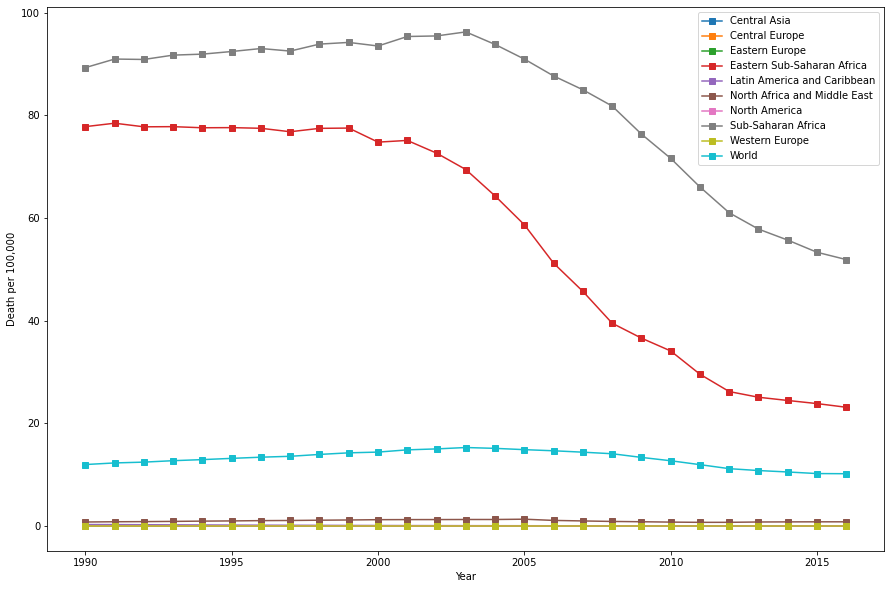

In [37]:
plt.figure(figsize = (15, 10))

for location in locations:
    print(location)
    temp_df = region_df[region_df['Entity'] == location]
    plt.plot(temp_df['Year'].tolist(), temp_df['death_per_100000'].tolist(), label = location, marker = "s")
    plt.legend()
    
plt.xlabel('Year')
plt.ylabel('Death per 100,000')

Central Asia
Central Europe
Eastern Europe
Eastern Sub-Saharan Africa
Latin America and Caribbean
North Africa and Middle East
North America
Sub-Saharan Africa
Western Europe
World


Text(0, 0.5, 'Death per 100,000')

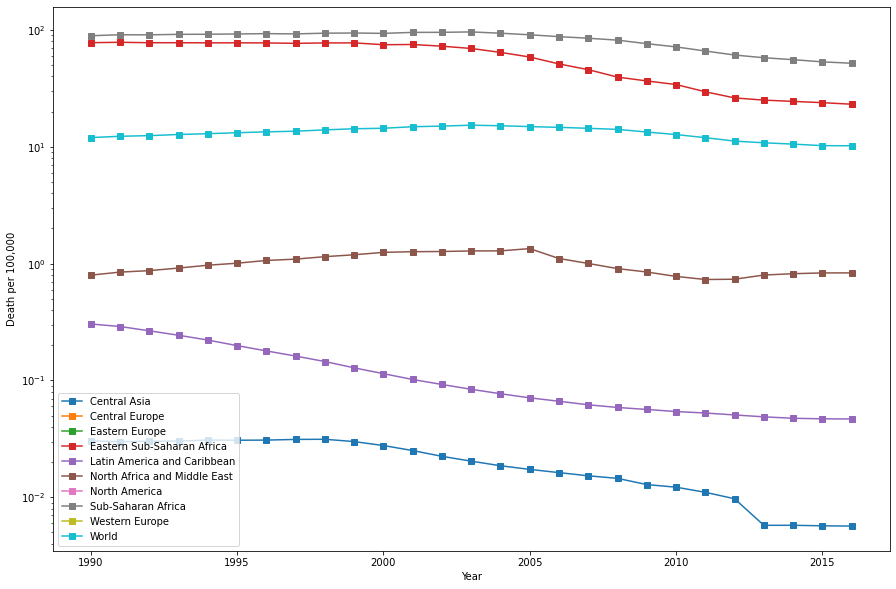

In [38]:
plt.figure(figsize = (15, 10))

for location in locations:
    print(location)
    temp_df = region_df[region_df['Entity'] == location]
    plt.plot(temp_df['Year'].tolist(), temp_df['death_per_100000'].tolist(), label = location, marker = "s")
    plt.yscale('log')
    plt.legend()
    
plt.xlabel('Year')
plt.ylabel('Death per 100,000')

From the above graph, 4 regions are missing. This is because their death rate is 0 as shown in the bottom. Furthermore, from the above plot, Sub-Saharan Africa death rate is higher than World. Looking at the trend, can observe general decreasing trend for 5 out of the 6 regions except North Africa and Middle East.

In [39]:
region_df[region_df['death_per_100000'] == 0]['Entity'].unique()

array(['Central Europe', 'Eastern Europe', 'North America',
       'Western Europe'], dtype=object)